### Module 3 Lab 2 

1. Load the dataset bike_day_raw.csv, which has the regression target cnt. This dataset is hourly bike rentals in the citybike platform. The cnt column is the number of rentals, which we want to predict from date and weather data.

- Split the data into a training and a test set using train_test_split. 

- Use the LinearRegression class to learn a regression model on this data. 

- You can evaluate with the score method, which provides the R^2or using the mean_squared_error function from sklearn.metrics (Challenge: You can also write it yourself in numpy).


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('bike_day_raw.csv')
X = data.drop("cnt", axis=1)
y = data.cnt

display(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [27]:
from sklearn.linear_model import LinearRegression
import numpy

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
ybar = numpy.sum(y_train)/len(y_train)
ssreg = numpy.sum((lr.predict(X_train)-ybar)**2)
sstot = numpy.sum((y_train - ybar)**2)
print(ssreg/sstot)

print(lr.score(X_test, y_test))

0.5328925529498699
0.5328925529498711
0.4991033756876272


2. Load the diabetes dataset using sklearn.datasets.load_diabetes.
- Scale the dataset (you can be creative and make pipelines)
- Apply LinearRegression, 
- Apply Ridge and do grid search 
- Apply Lasso and do grid search
- Visualize the coefficients.


In [28]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_diabetes
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

diabetes = load_diabetes()

In [29]:
# Create a dataframe to make a boxplot

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df.boxplot()

plt.figure()
plt.title("Target Distribution")
plt.hist(diabetes.target, bins="auto")

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target)

Linear Regression with Scaling: 0.4550692802689526
Ridge Regression with Scaling: 0.4562083437984704


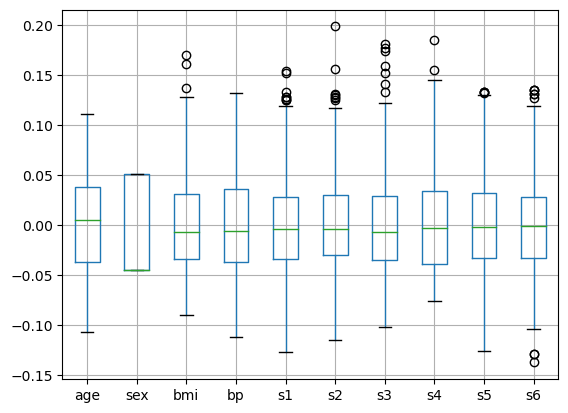

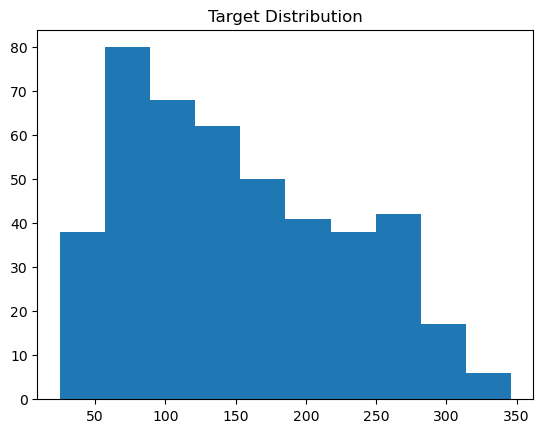

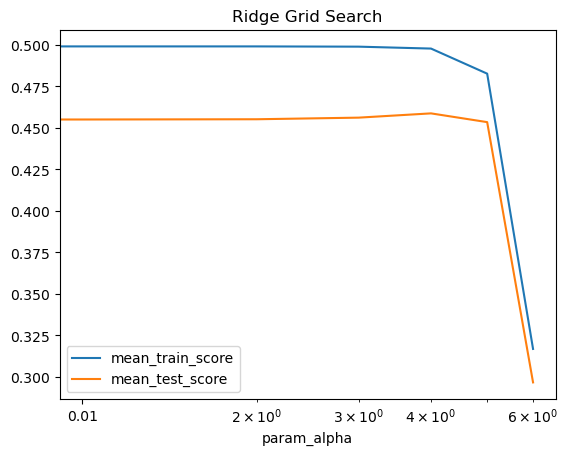

In [30]:
# Scaled Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scores = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=10)
print("Linear Regression with Scaling:", lr_scores.mean())
ridge_scores = cross_val_score(Ridge(), X_train_scaled, y_train, cv=10)
print("Ridge Regression with Scaling:", ridge_scores.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 7)}
my_grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)
my_grid.fit(X_train_scaled, y_train)

res = pd.DataFrame(my_grid.cv_results_)
res.plot("param_alpha", ["mean_train_score", "mean_test_score"], logx=True)
plt.title("Ridge Grid Search")
plt.legend()
plt.show()

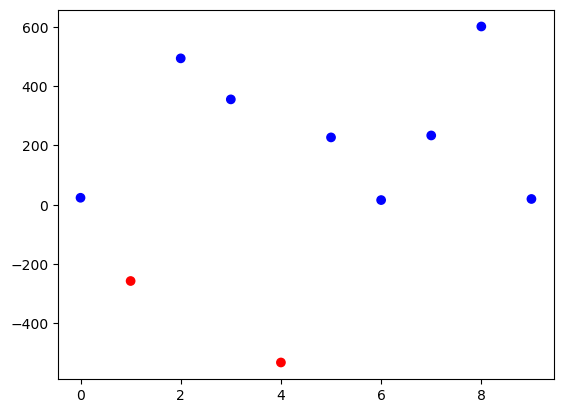

In [31]:
lr = LinearRegression().fit(X_train, y_train)
plt.scatter(range(X_train.shape[1]), lr.coef_, c=np.sign(lr.coef_), cmap="bwr_r")
plt.show()

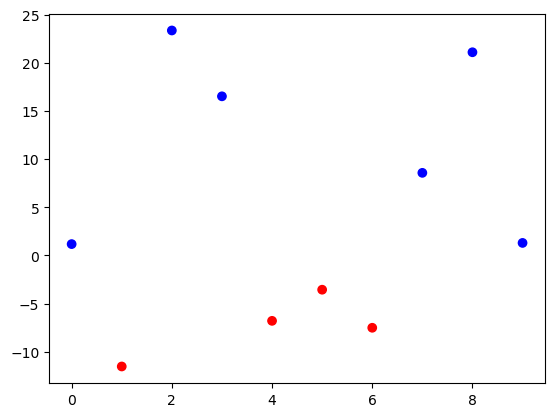

In [32]:
ridge = my_grid.best_estimator_
plt.scatter(range(X_train.shape[1]), ridge.coef_, c=np.sign(ridge.coef_), cmap="bwr_r")
plt.show()

In [33]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001     , 0.00177828, 0.00316228, 0.00562341, 0.01      ,
       0.01778279, 0.03162278, 0.05623413, 0.1       , 0.17782794,
       0.31622777, 0.56234133, 1.        ])}


In [34]:
from sklearn.model_selection import GridSearchCV, train_test_split


# Perform Grid Search Cross Validation

my_grid = GridSearchCV(Lasso(max_iter=int(1e6)), param_grid, cv=10, return_train_score=True)

# Fit the grid search on the scaled training data
my_grid.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
print("Best parameters:", my_grid.best_params_)
print("Best cross-validation score:", my_grid.best_score_)


Best parameters: {'alpha': 0.31622776601683794}
Best cross-validation score: 0.4578282749171262


In [36]:
my_grid.score(X_test_scaled, y_test)

0.5606982085610821

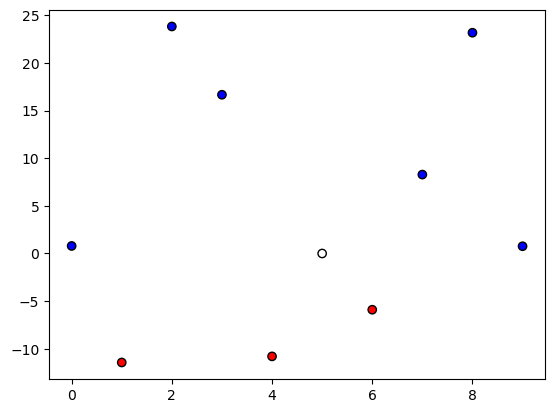

In [40]:
lasso=my_grid.best_estimator_
plt.scatter(range(X_train.shape[1]), lasso.coef_, c=np.sign(lasso.coef_), cmap="bwr_r", edgecolor='k')
plt.show()